## Predicting Startup Success

### Problem Statement: 
Venture funding in 2021 broke records as total investments totaled \\$643 billion compared to $335 billion for 2020. All this money poured into early stage and private companies by venture capitalists and private equity firms go through a process of due-diligence. This is because investing in start-ups is considered highly risky as around 90% of start-ups fail with 10% of those failing within the first year. According to Crunchbase, venture funding for the third quarter of 2022 totaled \\$81 billion, down by \\$90 billion (53% YOY) and by \\$40 billion (33% QOQ) reflective of current economic conditions such as high interest rates that lead to a liquidity crunch. Ultimately, this makes investors to be more prudent when they decide to choose which companies to invest in as their goal is to "exit" with a profit. This is only possible if the company does not fail and survives by going to IPO or being acquired. The goal of this project is to create a model using machine-learning algorithms to classify whether a start-up will be able to survive ("still under operations or successfully acquired") or shut-down ("closed") its operations.


### Description of Dataset: 
The source lists out startups compiled by Crunchbase, a website for information on early state startups to Fortune 1000, and provides detailed information regarding the company such as: location, funding details, investment types, and the current status of the company (closed, still under operations, or acquired).
The dataset has a total of 49438 data points with 39 features. 

## Source : https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase

In [1]:
import pandas as pd

In [2]:
startups_df = pd.read_csv("data/investments_VC.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_32776\3181845353.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  startups_df = pd.read_csv("data/investments_VC.csv")


In [3]:
startups_df.info()
startups_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49433 non-null  object 
 2   homepage_url          45983 non-null  object 
 3   category_list         45481 non-null  object 
 4    market               45480 non-null  object 
 5    funding_total_usd    49432 non-null  object 
 6   status                48121 non-null  object 
 7   country_code          44147 non-null  object 
 8   state_code            30179 non-null  object 
 9   region                44168 non-null  object 
 10  city                  43317 non-null  object 
 11  funding_rounds        49407 non-null  object 
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38493 non-null  object 
 15  founded_year       

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0,0,0,0,0,0,0,0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0,0,0,0,0,0,0,0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0.0,0.0


In [4]:
for col in startups_df.columns:
    print(col)

permalink
name
homepage_url
category_list
 market 
 funding_total_usd 
status
country_code
state_code
region
city
funding_rounds
founded_at
founded_month
founded_quarter
founded_year
first_funding_at
last_funding_at
seed
venture
equity_crowdfunding
undisclosed
convertible_note
debt_financing
angel
grant
private_equity
post_ipo_equity
post_ipo_debt
secondary_market
product_crowdfunding
round_A
round_B
round_C
round_D
round_E
round_F
round_G
round_H


For this assignment, your goal should be to get started cleaning and exploring your dataset.  Submit a zipped file with your dataset and a jupyter notebook containing your initial exploration and cleaning.  At a high level your goals are:

Clean and organize your dataset
Determine how to handle missing values
Visualize and explore features distributions and within group distributions
Visualize relationships between features
Identify important findings and discuss these in a markdown cell.

In [5]:
#Clean Dataset 
#We first rename column names that have empty spaces
startups_df=startups_df.rename(columns = {' funding_total_usd ':'total_funding'})
startups_df=startups_df.rename(columns = {' market ':'market'})
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49433 non-null  object 
 2   homepage_url          45983 non-null  object 
 3   category_list         45481 non-null  object 
 4   market                45480 non-null  object 
 5   total_funding         49432 non-null  object 
 6   status                48121 non-null  object 
 7   country_code          44147 non-null  object 
 8   state_code            30179 non-null  object 
 9   region                44168 non-null  object 
 10  city                  43317 non-null  object 
 11  funding_rounds        49407 non-null  object 
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38493 non-null  object 
 15  founded_year       

In [6]:
#drop unnecessary columns such as permalink, homepage_url, category_list, state_code, city, founded_at, founded_month, founded_quarter
startups_df = startups_df.drop(['state_code','permalink','homepage_url','category_list','city','founded_at','founded_month','founded_quarter','undisclosed','region','first_funding_at','last_funding_at'], axis=1)

In [7]:
#drop empty NAN values and duplicates
startups_df = startups_df.dropna()
startups_df = startups_df.drop_duplicates()




In [8]:
# We have to convert total funding to a integer as it is currently a non-integer datatype
startups_df['total_funding']
startups_df['total_funding'] = startups_df['total_funding'].str.strip().str.replace("," , "")
startups_df['total_funding'] = startups_df['total_funding'].replace('-' , 0)
startups_df['total_funding'] = startups_df['total_funding'].astype('float')


In [9]:
# We also change year into int data type 
startups_df['founded_year'] = startups_df['founded_year'].astype('int')

In [10]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33060 entries, 0 to 49437
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  33060 non-null  object 
 1   market                33060 non-null  object 
 2   total_funding         33060 non-null  float64
 3   status                33060 non-null  object 
 4   country_code          33060 non-null  object 
 5   funding_rounds        33060 non-null  object 
 6   founded_year          33060 non-null  int32  
 7   seed                  33060 non-null  int64  
 8   venture               33060 non-null  int64  
 9   equity_crowdfunding   33060 non-null  int64  
 10  convertible_note      33060 non-null  int64  
 11  debt_financing        33060 non-null  int64  
 12  angel                 33060 non-null  int64  
 13  grant                 33060 non-null  int64  
 14  private_equity        33060 non-null  int64  
 15  post_ipo_equity    

We know have 33060 observations after cleaning the data that we can use for observations 

In [11]:
startups_df.describe()

,total_funding,founded_year,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,private_equity,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,3.306000e+04,33060.000000,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,...,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04,3.306000e+04
mean,1.510079e+07,2007.250151,2.591721e+05,9.050272e+06,6.480949e+03,2.693761e+04,2.201973e+06,7.399999e+04,1.457894e+05,2.349539e+06,...,3.437302e+04,8.639418e+03,1.438637e+06,1.864055e+06,1.576511e+06,1.006370e+06,4.725051e+05,2.402200e+05,8.390249e+04,2.128252e+04
std,1.799673e+08,7.347842,9.986574e+05,3.302623e+07,1.804899e+05,1.690866e+06,1.674059e+08,5.579638e+05,4.971661e+06,3.642103e+07,...,2.851820e+06,5.140379e+05,5.555709e+06,8.554353e+06,9.307874e+06,1.175453e+07,6.454155e+06,7.630509e+06,6.409924e+06,3.322357e+06
min,0.000000e+00,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.044800e+05,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.350000e+06,2009.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.500000e+06,2012.000000,5.000000e+04,6.192304e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,2014.000000,1.000000e+08,2.351000e+09,1.700000e+07,3.000000e+08,3.007950e+10,3.025439e+07,4.774754e+08,3.500000e+09,...,4.000000e+08,7.200000e+07,2.250000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


Text(0.5, 1.0, 'Top 10 Countries where startups are founded')

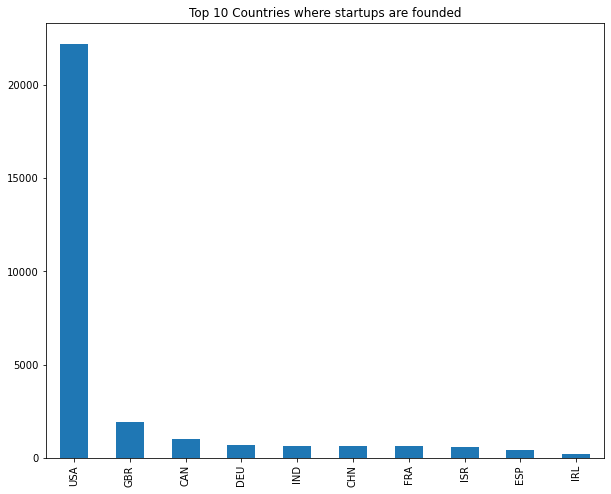

In [12]:
#visual analysis and exploration of data findings

import numpy as np
import matplotlib.pyplot as plt

# 1. Top 10 Countries where startups are founded 
top_10 = startups_df["country_code"].value_counts()[:10]
top_10.plot(kind = 'bar', figsize=(10,8))
plt.title("Top 10 Countries where startups are founded")



Observation: We find that USA, England, Canada, Germany, India, China, France, Israel, Spain, Ireland are the the 10 countries where startups were founded. 

In [13]:
# 2. Countries with most total funding
top_country_total_funding = startups_df.groupby(["country_code"], as_index = False).sum().sort_values("total_funding", ascending = False)
top_country_total_funding = top_country_total_funding.nlargest(10,'total_funding')
top_country_total_funding


,country_code,total_funding,founded_year,seed,venture,equity_crowdfunding,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
105,USA,3.853979e+11,44561401,6026190241,232573784955,143490127,834901700,64394821226,1446111846,3238654432,...,913505052,222022346,35353198145,47780858935,40739955099,27999140278,12880339574,6133701967,1.144116e+09,50000000.0
20,CHN,2.310949e+10,1275572,19586346,13479334224,0,0,1351049999,174466455,327500,...,0,0,2579275861,3244066701,3577506591,1376558853,666091950,286611871,1.890000e+08,0.0
37,GBR,1.711129e+10,3813866,599319371,10072993250,45515518,2742252,466861178,156048057,762552400,...,0,34240697,2366915387,2058890721,1729292703,548693247,198850000,70000000,0.000000e+00,0.0
46,IND,1.179682e+10,1295183,83348761,7063332900,8000,4431000,2708039510,34497000,80000,...,210000,250000,477801755,873556734,566113477,735000000,545000000,433700000,1.060000e+09,600000000.0
17,CAN,9.990898e+09,2085178,263795049,5319282097,7290500,15598470,424902572,108233349,25910234,...,0,1395238,1134400917,1431141406,901144471,194893461,36519729,800000,1.700000e+06,0.0
27,DEU,6.853938e+09,1407773,156653082,4681423280,5571780,185000,95529872,26561178,3288337,...,0,4345183,777383109,793285162,609270842,628175985,247239280,102500000,3.500000e+08,0.0
49,ISR,5.588930e+09,1154015,172752717,4343743284,3090000,4500000,513730572,45990000,34125000,...,12500000,2100000,702126898,1101741000,716750000,455910149,250010840,169095270,0.000000e+00,0.0
36,FRA,3.799188e+09,1242051,140613145,3190876614,398097,642698,53775183,59595766,4939636,...,0,3072580,706184751,651091992,411163503,344366820,53360403,0,0.000000e+00,0.0
74,NLD,3.595249e+09,445819,51452607,1030923580,78614,13838976,794002028,17644759,336196,...,0,12780956,160759514,242472340,74849167,81020000,23000000,0,0.000000e+00,0.0
33,ESP,3.339220e+09,817642,125530990,1113561826,35000,1748461,1150265164,34067340,3030328,...,0,15388,197173788,329622079,166117186,36886205,95000000,0,0.000000e+00,0.0


Observation: We see that in terms of countries that raised most funding for startups are USA, China, England, India, Canada.
This order is different from countries that had the most startups as China is one example where it had more funding but had a fewer number of startups than England.

array([[<AxesSubplot:title={'center':'founded_year'}>]], dtype=object)

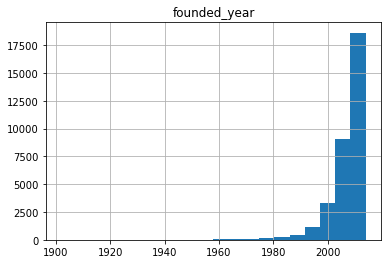

In [14]:
# 3. Distriubtion of the years when they were founded
startups_df.hist(column='founded_year', bins = 20)

Observation: We see that most of the companies are founded after 2000 where there was a boom in early stage companies with the data points skewed to the left. 


In [15]:
# 4. Top 10 Years where companies were founded
top_10_year = startups_df["founded_year"].value_counts()[:10]
top_10_year

2012    4320
2011    4199
2010    3260
2013    3171
2009    2612
2007    2110
2008    2099
2006    1654
2005    1294
2004    1058
Name: founded_year, dtype: int64

Finding: We see that there is an increasing trend of the number of startups toward more recent years. There was a boom in the number of startups founded after 2010. 

<AxesSubplot:ylabel='status'>

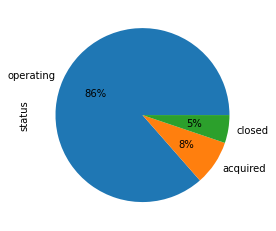

In [16]:
# 5. startup status
status = startups_df["status"].value_counts()
status
status.plot(kind='pie',autopct='%1.0f%%')

Observation : We see that around 86% of the companies in our data are still operating, 8% acquired (sold), 5% shut down its operations. 

Text(0, 0.5, 'Total funding USD in billions')

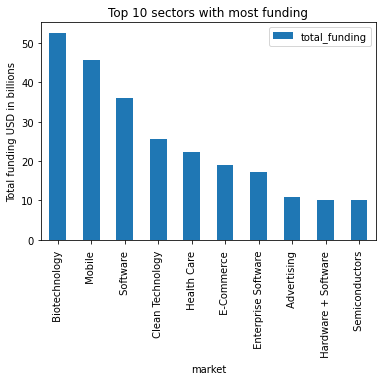

In [17]:
# 6. We observe the top 10 sector with most funding 
sector_total_funding = startups_df.groupby(["market"], as_index = False).sum().sort_values("total_funding", ascending = False)
sector_total_funding = sector_total_funding[:10]
sector_total_funding['total_funding'] = sector_total_funding['total_funding']/1000000000
sector_total_funding
sector_total_funding.plot.bar(x = "market", y="total_funding")
plt.title("Top 10 sectors with most funding")
plt.ylabel("Total funding USD in billions")


Observation : We can see that Biotechnology sector leads in total amount of investments raised with mobile and software following. The sector involved with technology (software) and health seems to be most funded.

C:\Users\user\AppData\Local\Temp\ipykernel_32776\161177097.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_rounds_funding = startups_df.sum()


Text(0, 0.5, 'Total funding USD in billions')

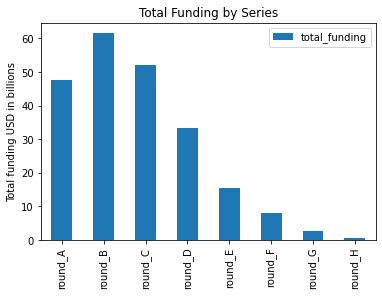

In [18]:
# 7. Total funding for each round series 
sum_rounds_funding = startups_df.sum()
sum_round = sum_rounds_funding[-8:].to_frame(name="total_funding")
sum_round['total_funding'] = sum_round['total_funding']/1000000000
sum_round.plot.bar()
plt.title("Total Funding by Series")
plt.ylabel("Total funding USD in billions")

Observation : We see that there seems to be a trend that after the third round (series C), there seems to be a declining trend for funding receiveced at each round. 
This makes sense as the further the company goes through each round, the company is expected to rely on their earnings to run their operations rather than capital raised. 

In [19]:
# 8. Average funding for status 
df = startups_df.groupby(["status"])["total_funding"].mean()
df.to_frame(name = "Average funding")

,Average funding
status,
acquired,2.251721e+07
closed,6.703145e+06
operating,1.488769e+07


Observation : We can find that startups that were acquired on average receieved that most funding with around $22.5 million and those that closed received $6.7 million. 
This finding is logical that those that shut down its operations most likely due to funding issues show that they were unable to raise as much capital when compared to companies that were acquired or under oeprations. 


In [20]:
# 9. Which sector closed the most 
closed = startups_df[startups_df["status"]=="closed"]
closed["market"].value_counts().nlargest(10)

 Software                173
 Curated Web             157
 Mobile                  110
 Games                    77
 Biotechnology            75
 Social Media             71
 E-Commerce               68
 Advertising              53
 Clean Technology         39
 Hardware + Software      38
Name: market, dtype: int64

Observation : The companies that closed the most occured in the software and biotechnology sector. The most popular and well funded sectors also seemed to have many startups that closed. 

In [21]:
# 10. Most successful sector
successful = startups_df[startups_df["status"]!="closed"]
successful["market"].value_counts().nlargest(10)

 Software                3344
 Biotechnology           2283
 Mobile                  1308
 E-Commerce              1187
 Curated Web             1005
 Enterprise Software      954
 Health Care              791
 Advertising              747
 Games                    736
 Hardware + Software      731
Name: market, dtype: int64

Observation : We see that companies that operate in the software, technology, and biohealth sector seemed to be those that were successful in running their operations. 

In [22]:
# 11. Startup investment sources (angel, pe, venture funding)
venture_funding = startups_df["venture"].sum()
angel_funding = startups_df["angel"].sum()
pe_funding = startups_df["private_equity"].sum()
my_array = np.array([venture_funding, angel_funding, pe_funding])
df = pd.DataFrame(my_array, index = ["venture","angel", "pe"], columns = ["Total Funding"])
df

,Total Funding
venture,299202007261
angel,2446439792
pe,77675760580


Observation : We see that VC firms invested the most amount of capital followed by PE, and angel investors. 
This is in line with the idea that angel investors invest the earliest stage followed by VC firms who primarily invest in startups and 
PE firms are most risk averse among the three  

In [23]:
# 12. Top 10 companies that raised most funding throughout entire time period 
top_funding_10 = startups_df.nlargest(10,'total_funding')
top_funding_10

,name,market,total_funding,status,country_code,funding_rounds,founded_year,seed,venture,equity_crowdfunding,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
45815,Verizon Communications,Mobile,3.007950e+10,operating,USA,5,1983,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.0
8664,Clearwire,Internet,5.700000e+09,acquired,USA,4,2003,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.0
15315,First Data Corporation,Trading,3.500000e+09,operating,USA,1,1971,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.0
38289,sigmacare,Health and Wellness,2.600000e+09,operating,USA,1,2005,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.0
14705,Facebook,Communities,2.425700e+09,operating,USA,11,2004,0,615200000,0,...,0,0,12700000,27500000,375000000,200000000,0,0,0.000000e+00,0.0
7328,Carestream,Biotechnology,2.400000e+09,operating,USA,1,2007,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.0
15569,Flipkart,Online Shopping,2.351140e+09,operating,IND,11,2007,0,2351000000,0,...,0,0,1000000,10000000,20000000,150000000,360000000,210000000,1.000000e+09,600000000.0
35399,Reliance Jio Infocomm Ltd.,Development Platforms,2.250000e+09,operating,IND,2,2007,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.0
48936,Zebra Technologies,Enterprise Software,2.000000e+09,operating,USA,1,1991,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.0
34329,Quad/Graphics,Local Businesses,1.900000e+09,operating,USA,1,1971,0,0,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.0


Observation : We see that the companies that were able to raise the most funding are still operating to this day and some of them are well-known successful companies that are already listed on the stock exchange with the most famous ones such as Facebook, Verizon, Flipcart. 
Most well funded companies are found in the USA with India following. 

In [24]:
# 13. Top 10 companies that raised most funding after 2010 
startups_2010_df = startups_df[startups_df["founded_year"]>=2010]
startups_2010_df.nlargest(10,'total_funding')

,name,market,total_funding,status,country_code,funding_rounds,founded_year,seed,venture,equity_crowdfunding,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
45671,Venari Resources,Oil and Gas,1.498515e+09,operating,USA,1,2012,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
39127,Snapdeal,E-Commerce,1.062700e+09,operating,IND,8,2010,0,335700000,0,...,0,0,12000000,40000000,0,75000000,75000000,133700000,0.0,0.0
23576,Lazada Group,E-Commerce,6.851012e+08,operating,MYS,6,2012,0,685101159,0,...,0,0,40000000,26000000,20000000,100000000,250000000,249101159,0.0,0.0
11336,Delivery Hero,Hospitality,6.566633e+08,operating,DEU,9,2011,0,656663300,0,...,0,0,5530000,14853300,33280000,80000000,88000000,85000000,350000000.0,0.0
41892,Tamra-Tacoma Capital Partners,Solar,6.350000e+08,operating,USA,5,2012,2250000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
25134,Magic Leap,Video,5.920000e+08,operating,USA,2,2011,0,592000000,0,...,0,0,50000000,542000000,0,0,0,0,0.0,0.0
39394,SoFi,Peer-to-Peer,5.661999e+08,operating,USA,10,2011,0,165199900,0,...,0,0,8000000,77199900,80000000,0,0,0,0.0,0.0
36322,Rouse Properties,Real Estate,5.100000e+08,operating,USA,1,2012,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3932,AvantCredit,Finance,5.090000e+08,operating,USA,6,2012,0,109000000,0,...,0,0,9000000,25000000,75000000,0,0,0,0.0,0.0
28505,Navitas Midstream Partners,Oil & Gas,5.000000e+08,operating,USA,1,2013,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


Observation : Since there was a boom in the number of startups founded after 2010, we wanted to observe those that were most funded during this time period and we see some of the more latest names such as Lazada, Delivery Hero, Sofi


In [25]:
# We want to initialize the column that we want to predict for our model in the future
# Our goal is to predict whether a company will be able to survive or close its operations (a binary classification problem)
# Thus we assign 1 to those whose status are currently "operating" or "acquired" and 0 to the ones "closed"

startups_df.loc[startups_df["status"] == "operating", "status"] = 1
startups_df.loc[startups_df["status"] == "acquired", "status"] = 1
startups_df.loc[startups_df["status"] == "closed", "status"] = 0

# Now as our last step of data analysis before creating a model is to see if there are any variable features that are closely related 
corr_mat=startups_df.corr()
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values(ascending = False)
print(sorted_mat)


debt_financing  total_funding    0.933604
round_H         round_G          0.858450
round_D         venture          0.607706
round_C         venture          0.587558
round_E         venture          0.551142
                                   ...   
round_C         founded_year    -0.047094
private_equity  founded_year    -0.062722
founded_year    total_funding   -0.067743
grant           founded_year    -0.090100
venture         founded_year    -0.093135
Length: 231, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_32776\2945576204.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


Observation : We see that debt financing and total funding, round H & round G, late rounds & Venture funding seem to have a meaningful correlation between the two features. 
However, we are unable to find a feature that has a strong correlation to the "survived" feature column that we are trying to predict. 
Thus, we will be exploring which features and which model will be used to best predict the result of a startup's success. 

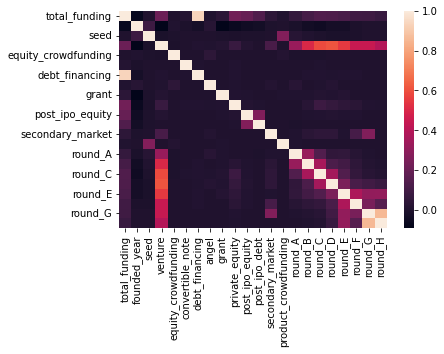

In [26]:
# Correlation heatmap 
import seaborn as sb
startups_df.corr()
data_plot = sb.heatmap(startups_df.corr(), annot= False)
plt.show()



In [27]:
startups_df

,name,market,total_funding,status,country_code,funding_rounds,founded_year,seed,venture,equity_crowdfunding,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,News,1750000.0,1,USA,1,2012,1750000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,'Rock' Your Paper,Publishing,40000.0,1,EST,1,2012,40000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,(In)Touch Network,Electronics,1500000.0,1,GBR,1,2011,1500000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,-R- Ranch and Mine,Tourism,60000.0,1,USA,2,2014,0,0,60000,...,0,0,0,0,0,0,0,0,0.0,0.0
8,004 Technologies,Software,0.0,1,USA,1,2010,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,Zyraz Technology,Biotechnology,15419877.0,0,MYS,4.0,1994,0,7991547,0,...,0,0,7991547,0,0,0,0,0,0.0,0.0
49432,Zytoprotec,Biotechnology,2686600.0,1,AUT,1.0,2007,0,2686600,0,...,0,0,2686600,0,0,0,0,0,0.0,0.0
49433,Zzish,Education,320000.0,1,GBR,1.0,2013,320000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
49435,Zzzzapp Wireless ltd.,Web Development,97398.0,1,HRV,5.0,2012,71525,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [28]:
startups_df

,name,market,total_funding,status,country_code,funding_rounds,founded_year,seed,venture,equity_crowdfunding,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,News,1750000.0,1,USA,1,2012,1750000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,'Rock' Your Paper,Publishing,40000.0,1,EST,1,2012,40000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,(In)Touch Network,Electronics,1500000.0,1,GBR,1,2011,1500000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,-R- Ranch and Mine,Tourism,60000.0,1,USA,2,2014,0,0,60000,...,0,0,0,0,0,0,0,0,0.0,0.0
8,004 Technologies,Software,0.0,1,USA,1,2010,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,Zyraz Technology,Biotechnology,15419877.0,0,MYS,4.0,1994,0,7991547,0,...,0,0,7991547,0,0,0,0,0,0.0,0.0
49432,Zytoprotec,Biotechnology,2686600.0,1,AUT,1.0,2007,0,2686600,0,...,0,0,2686600,0,0,0,0,0,0.0,0.0
49433,Zzish,Education,320000.0,1,GBR,1.0,2013,320000,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
49435,Zzzzapp Wireless ltd.,Web Development,97398.0,1,HRV,5.0,2012,71525,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [29]:
#year should be an object string and funding rounds should be number
startups_df = startups_df.astype({"status":"int"})
startups_df = startups_df.astype({"funding_rounds":"int"})
startups_df = startups_df.astype({"founded_year":"str"})

In [30]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33060 entries, 0 to 49437
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  33060 non-null  object 
 1   market                33060 non-null  object 
 2   total_funding         33060 non-null  float64
 3   status                33060 non-null  int32  
 4   country_code          33060 non-null  object 
 5   funding_rounds        33060 non-null  int32  
 6   founded_year          33060 non-null  object 
 7   seed                  33060 non-null  int64  
 8   venture               33060 non-null  int64  
 9   equity_crowdfunding   33060 non-null  int64  
 10  convertible_note      33060 non-null  int64  
 11  debt_financing        33060 non-null  int64  
 12  angel                 33060 non-null  int64  
 13  grant                 33060 non-null  int64  
 14  private_equity        33060 non-null  int64  
 15  post_ipo_equity    

In [31]:

#classification problem so use logistic regression, knn classifying, decision trees see which is best finish by sunday

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.datasets import make_blobs
from sklearn import set_config
set_config('display')

In [210]:
#classification by using K-Nearest Neighbors algorithm
cat_cols = ["market","country_code","founded_year"]
num_cols = ["total_funding","funding_rounds","seed", "venture","equity_crowdfunding","convertible_note","debt_financing","angel","grant","private_equity",
           "post_ipo_equity","post_ipo_debt","secondary_market","product_crowdfunding","round_A","round_B","round_C","round_D","round_E","round_F",
           "round_G","round_H"]

    
X = startups_df.loc[:, cat_cols + num_cols]
y = startups_df['status']

#create OHE
ohe = OneHotEncoder(sparse = False, drop = 'first',handle_unknown = 'ignore')
#transformer
encoder = make_column_transformer((ohe, cat_cols), remainder=StandardScaler())

In [212]:
len(num_cols)+len(cat_cols)

25

In [181]:
onehot_encoder = OneHotEncoder(sparse=False, drop = 'first',handle_unknown = 'ignore')
encoder_name = make_column_transformer((onehot_encoder, cat_cols))
X_train_encoded_name = encoder_name.fit_transform(X_train)
feature_names = encoder_name.get_feature_names_out()
len(feature_names)

886

In [34]:

encoder

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['market', 'country_code', 'founded_year'])])

In [47]:
# Here we use the oversampling method to balance the dataset as the dataset was 95% 1's and 5% 0's
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=22)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state = 22)


In [48]:
X_train
y_train.value_counts()

0    23531
1    23489
Name: status, dtype: int64

In [49]:
y_test.value_counts()

1    7858
0    7816
Name: status, dtype: int64

In [50]:
#fit and transform train
X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded
X_test_encoded = encoder.transform(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [51]:
#transform the the test
X_test_encoded = encoder.transform(X_test)


C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [149]:
#instantiate the KNN estimator
knn = KNeighborsClassifier(n_neighbors=5)

# This is our baseline a 50% accuracy that we will use to determine if our model did better or worse

In [155]:
y_train.value_counts(normalize = True)

0    0.500447
1    0.499553
Name: status, dtype: float64

In [151]:
#create a Pipeline
pipe = Pipeline([('encode', encoder), ('knn', knn)])


In [152]:
#Using a pipeline 
pipe.fit(X_train, y_train)

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['market', 'country_code',
                                                   'founded_year'])])),
                ('knn', KNeighborsClassifier())])

In [153]:
pipe.score(X_train, y_train)

0.9294980859208847

In [154]:
pipe.score(X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.904172514992982

When using a KNN model with n=5 neighbors, we see that our model accurately predicted around 93% of the training data set and 90.4% of the testing data set. This is significantly better than our baseline of simply guessing with a 50% chance. Next, we will proceed to use a logistic classification model then use a grid search to find the best features to use to improve our KNN model.

In [156]:
#logistic regression model
#classification problem 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)

In [186]:
clf = LogisticRegression(max_iter=500)
logistic_pipe = Pipeline([('transform',encoder),('model',clf)])

In [187]:
logistic_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['market', 'country_code',
                                                   'founded_year'])])),
                ('model', LogisticRegression(max_iter=500))])

In [188]:
#score on train and test
print(f'Train Score: {logistic_pipe.score(X_train, y_train)}')
print(f'Test Score: {logistic_pipe.score(X_test, y_test)} ')

Train Score: 0.7272649936197363
Test Score: 0.717366339160393 


C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


When using a logistic regression model, we see that our model accurately predicted around 72.7% of the training data set and 71.7% of the testing data set. While this is better than our baseline of simply guessing with a 50% chance, we see that its performance is behind using a KNN neighbor classifying model of 90.4% accuracy. Next, we will try to implement the knn model using both cross-validation and grid searching to see if we can tune our model to improve our accuracy. 

In [73]:
#Compare to Knn and grid searching
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


In [ ]:
#cross validate knn 
cv1 = cross_val_score(estimator = knn, X=X_train_encoded, y= y_train)



In [201]:
print(cv1.mean(), cv1.std())

0.8864951084644831 0.0025738124073446567


In [192]:
#knn with 10
knn_10 = KNeighborsClassifier(n_neighbors = 10)


In [194]:
cv2 = cross_val_score(estimator = knn_10, X=X_train_encoded, y= y_train)
print(cv2.mean(), cv2.std())

0.8177371331348361 0.003197213181278804


Upon doing a cross-validation search to see whether a higher number of neighbors lead to a higher score we find that a lower n leads to a more accurate model with the cross-validation score for n=5 (88.6%) vs n=10 (81.77%). Then we can now use any number between 1 to 5 to grid search for the model as a lower n results in a more accurate model. 

In [203]:
#Grid Search 
knn_params = {'n_neighbors': [1, 2, 3, 4, 5]}
knn_base = KNeighborsClassifier()

In [204]:
knn_grid = GridSearchCV(estimator = knn_base, param_grid = knn_params, cv = 5)

In [205]:
knn_grid.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [206]:
#Score on the training data
knn_grid.score(X_train_encoded, y_train)

0.9890259464057848

In [207]:
# See all results
pd.DataFrame(knn_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086931,0.013530,9.220819,0.177366,1,{'n_neighbors': 1},0.943535,0.943216,0.940238,0.942790,0.950766,0.944109,0.003526,1
1,0.069788,0.004921,9.247300,0.199545,2,{'n_neighbors': 2},0.906316,0.913016,0.908443,0.909932,0.913866,0.910315,0.002812,3
2,0.078610,0.004768,9.742089,0.285763,3,{'n_neighbors': 3},0.909613,0.914398,0.908656,0.910251,0.916100,0.911803,0.002909,2
3,0.076092,0.008798,11.899127,0.353571,4,{'n_neighbors': 4},0.883667,0.886750,0.879200,0.883773,0.888133,0.884305,0.003078,5
4,0.081002,0.011091,11.810024,0.120310,5,{'n_neighbors': 5},0.885155,0.888558,0.882284,0.886963,0.889515,0.886495,0.002574,4


In [208]:
#best params 
knn_grid.best_params_

{'n_neighbors': 1}

When doing a grid search with n=1,2,3,4,5 parameters, we find that n=1 has the highest mean test score with 94.4% and n=5 has the lowest score with 88.65%. However, when we use the standard deviation test score, we find that n=5 has the lowest and thus best with 0.002574 and n=1 has the highest standard deviation. While one can simply point out that we should use n=1 as the best parameter for our model, a lower n neighbors in KNN generally can lead to overfitting because the model is more likely to choose the closest neighbors when n is lower. Thus, for our model purposes we will use n=5 as the best parameter and conclude that our knn classifier accurately predicts with an average score of 88.6%. We see that this is still better than our logistic regression model (71.7%) but it is slightly behind the knn model (90.4%) without cross validation (into 5 splits). Because cross validation technique helps to evaluate the performance of the model, we will use this score of 88.6% as our best model so far.

In [209]:
#decision tree classifier (basic)
from sklearn.tree import DecisionTreeClassifier



In [84]:
tree_pipe = Pipeline([('preprocess', encoder),
                 ('model', DecisionTreeClassifier())])

In [85]:
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['market', 'country_code',
                                                   'founded_year'])])),
                ('model', DecisionTreeClassifier())])

In [86]:
#evaluate model
tree_pipe.score(X_train, y_train)

0.9919183326244151

In [87]:
tree_pipe.score(X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9517672578792905

We see that when using a decision tree classifier without initializing any parameters, it gives a training score of 99% with a testing score of 95.17%. The model produces an overfitting model as it tries to fit the training data until it is able to classify them accordingly. To mitigate the risk of overfitting, we will use several hyperparameters to reduce overfitting then explore other techniques such as random forest. 

In [217]:
#hyperparameter overfit using max_depth, min_samples_split, min_samples_leaf

#instantiate model with:
# - a maximum depth of 5
# at least 7 samples required in order to split an internal node
# at least 3 samples in each leaf node
# random state of = 42
dt = DecisionTreeClassifier(max_depth = 25, 
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            random_state = 42)

In [218]:
dt.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [219]:
#evaluate model
print(f'Score on training set:{dt.score(X_train_encoded,y_train)}')
print(f'Score on testing set:{dt.score(X_test_encoded, y_test)}')

Score on training set:0.8925350914504466
Score on testing set:0.8724639530432563


In [216]:
len(num_cols)+len(cat_cols)

25

In a scenario where we set the max depth of the tree to 25, min samples split to 7 and min sample leaf to 3, we see that our testing score is 87.2%. Here we set the max depth to 25 as there are a total number of 25 features (sum of cat_col and num_col) and concluded that the model is better if it can produce a more accurate score within 25 questions. We used min sample leaf of 3 as the default was 1 and thus we wanted to constrain the tree by using a higher leaf to reduce overfitting. Also, we use min sample split of 5 as the default value is 2. We find that this model is better than the logistic regression (71.7%) model and slightly behind the KNN classifier model (88.6%).

In [220]:
#Let's GridSearch to try to find the best tree 
#almost all similar 

params = {'max_depth':[5,10,15,20,25],
          'min_samples_split':[3,5,10],
          'min_samples_leaf': [2,3,4,5]}
gs = GridSearchCV(dt, param_grid=params)


In [221]:
gs.fit(X_train_encoded,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=25, min_samples_leaf=3,
                                              min_samples_split=5,
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 5, 10]})

In [222]:
#best decision tree
gs.best_estimator_
#what were the best parameters of our decision tree 
gs.best_params_
#what was the cross-validated score of the above decision tree 
gs.best_score_
#Evaluate model
print('train score', gs.score(X_train_encoded, y_train))
print('test score', gs.score(X_test_encoded, y_test))

train score 0.8925350914504466
test score 0.8724639530432563


In [223]:
gs.best_params_

{'max_depth': 25, 'min_samples_leaf': 3, 'min_samples_split': 3}

After doing a grid search, we find that the hyperparameters: max_depth:25, min_samples_leaf: 3, min_samples_split:3 produces the highest accuracy with a test score of 87.24% which was no different from our previous decision tree model with max_depth = 25, min_samples_leaf = 3, min_samples_split = 5. Again, we find that this model is better than the logistic model but slightly behind the KNN model. Next, we use the voting & random forest ensemble algorithms that combines the predictions of multiple individual models to make a final prediction. 

In [244]:
from sklearn.ensemble import VotingClassifier
#ensemble (use multiple models knn, logistic, and decision trees)

voter = VotingClassifier([('knn', KNeighborsClassifier(n_neighbors=5)),
                          ('logistic', LogisticRegression(max_iter=500)),
                          ('tree', DecisionTreeClassifier(max_depth = 25, min_samples_split = 3,min_samples_leaf = 3,random_state = 42))])

vote_pipe = Pipeline([('preprocess', encoder),
                      ('model', voter)])

In [245]:
#fit it
vote_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['market', 'country_code',
                                                   'founded_year'])])),
                ('model',
                 VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                                              ('logistic',
                                               LogisticRegression(max_iter=500)),
                                              ('tree',
                                               DecisionTreeClassifier(max_depth=25,
                                                           

In [246]:
vote_pipe.score(X_train,y_train)

0.9110378562313909

In [247]:
vote_pipe.score(X_test,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.890327931606482

When we use a voting classifier ensemble method to combine the predictions of our previous models KNN, Logistic, Decision Tree with the best hyperparameters we found earlier we get an accuracy of 89% on our testing score. The model improved slightly than the KNN model with a score of 88.6%. We see that using an ensemble method improves the performance. 

In [253]:
#import
from sklearn.ensemble import RandomForestClassifier

In [254]:
#pipeline
forest_pipe = Pipeline([('preprocess', encoder),
                        ('model', RandomForestClassifier(max_depth = 25, min_samples_split = 3,min_samples_leaf = 3,random_state = 42))])

In [255]:
#fit
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['market', 'country_code',
                                                   'founded_year'])])),
                ('model',
                 RandomForestClassifier(max_depth=25, min_samples_leaf=3,
                                        min_samples_split=3,
                                        random_state=42))])

In [256]:
#train score
forest_pipe.score(X_train, y_train)

0.7868353891960868

In [257]:
#train test
forest_pipe.score(X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.776381268342478

We see here that a random forest model has a 77.64% accuracy on the testing score. Here, we see that the model does worse than a normal decision tree with the same hyperparameters (87.24%). In further observations and next steps, we will discuss about ways to reconcile this issue. Just with what we have we see that the random forest model does better than the logistic model (71.4%) but is behind KNN, decision tree, voting classifier models. 

In [269]:
pd.DataFrame({'features':forest_pipe.named_steps['preprocess'].get_feature_names_out(),
              'importance':forest_pipe.named_steps['model'].feature_importances_}).sort_values(by = 'importance', ascending = False)

,features,importance
884,onehotencoder__founded_year_2013,0.092636
886,remainder__total_funding,0.083293
888,remainder__seed,0.057118
883,onehotencoder__founded_year_2012,0.056712
887,remainder__funding_rounds,0.051655
...,...,...
369,onehotencoder__market_ M2M,0.000000
371,onehotencoder__market_ Mac,0.000000
378,onehotencoder__market_ Mass Customization,0.000000
380,onehotencoder__market_ Material Science,0.000000


A further look into which features are the most important in driving the prediction of success show that the company was founded at 2013, higher total funding, higher seed funding, founded in 2012, had greater funding rounds were features that contributed to classifying a success of company. Finally, we use Xgboost to improve the performance of our decision tree models.

In [ ]:
import xgboost as xgb


In [ ]:
#instantiate classifier 
xboost = xgb.XGBClassifier(n_estimators = 10, max_depth = 25, min_samples_split = 3,min_samples_leaf = 3,random_state = 42)

In [ ]:
boost_pipe = Pipeline([('encoder', encoder),
                       ('model', xboost)])

In [ ]:
#score
boost_pipe.fit(X_train, y_train)

In [285]:
boost_pipe.score(X_train,y_train)

0.9554444917056572

In [284]:
boost_pipe.score(X_test,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9346688783973459

In our final model, our XGboost had a score of 93.46% in our testing data which provided the highest accuracy result when compared to previous models such as KNN, logistic, decision trees, and other ensemble models. 

### Summary of Findings 


In conclusion, in our study we used various methods of binary classification models such as KNN, Logistic, Decision Trees and ensemble models to determine which model has the best accuracy of predicting the outcome of a company's survival or failure.
The final model we would choose among these would be the XGBoost algorithm as it had a score of 93.46% with the following models in ranking order: Voting (89%), KNN (Cross validation 88.6%), Decision Tree (87.24%), Random Forest (77.24%), Logistic (71.7%). Overall, all our models beat our baseline of 50% accuracy.

Some important takeaways from the results are that these features: the company was founded at 2013, higher total funding, higher seed funding, founded in 2012, had greater funding rounds are key to success of company. We can see that higher funding, more funding rounds, higher seed funding are important key features that ensure the survival of a company as liquidity is a key factor as startups burn cash. 

Overall, our XGBoost model we came up can help with determining the likelihood of a startup's survival and provide as an extra resource in determining whether to invest in the company or not. However, one has to take note that simpy surviving is not the main goal as generating returns is key to the eyes of investors. Thus, it would have been better if we would also have data on the revenue and expenses the company was able to generate as well. 


### Next Steps

Some things to that could be done to improve the model for the future would be to resolve the issue that a random forest model did worse than a normal decision tree with the same hyperparameters. The random forest model might be overfitting the data or the optimal hyperparameters for the random forest model might differ from the decision tree grid search results we used. Another thing is that in our analysis, we used the oversampling method to balance our dataset as we had a very skewed binary result. Creating addtional copies of the minority class for our dataset may lead to overfitting so maybe we could try out other sampling techniques to balance the dataset such as undersampling or SMOTE. Finally, we know that around 90% of startups fail and our dataset had an unbalanced proportion as there were more "successful companies". Perhaps, a more updated dataset that had a large enough unique data points of failed companies would improve our model.
